In [6]:
import networkx as nx
import matplotlib.pyplot as plt
import random

import numpy as np

from utils.utils import generate_random_graph, show_graph
from main import GraphGenerator, Solver


In [7]:
# n = 15
# G = generate_random_graph(n)
# show_graph(G)

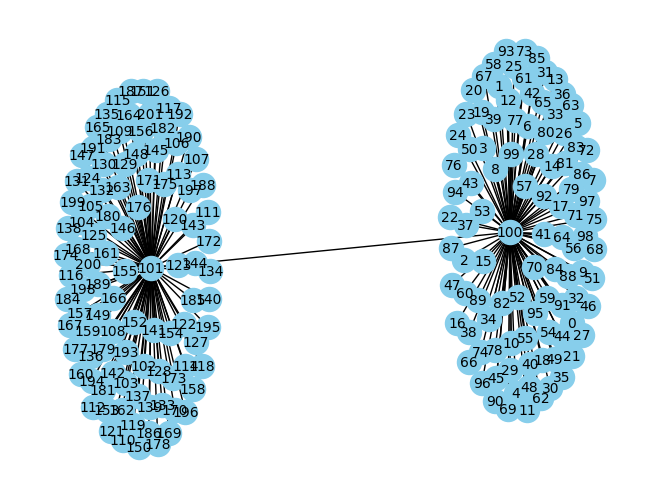

In [8]:
generator = GraphGenerator()

size = 202
pi = np.array([[0,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]])
priors = np.array([100,1,1,100])
priors = priors/size
graph = generator.generate(size, pi, priors)
show_graph(graph)

In [9]:
solver = Solver()
priors, pi = solver.EM_algorithm(graph, 4, n_iter=1)
print(priors)
print(pi)

  0%|          | 0/10 [00:00<?, ?it/s]

0.0
[0.25 0.25 0.25 0.25]
[[0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]
 [0.0625 0.0625 0.0625 0.0625]]


In [5]:
graph = generator.generate(size, pi, priors)
show_graph(graph)

Number of node(s) per cluster :  [50 50 50 50]  for a graph for size :  202


Exception: The priors are not correctly scaled with the size

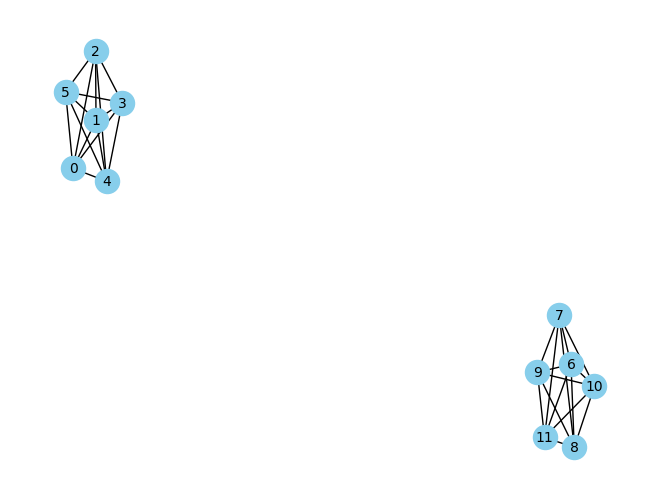

100%|██████████| 10/10 [00:00<00:00, 2428.95it/s]


1.1858517570522327e-06


 20%|██        | 2/10 [00:00<00:00, 742.35it/s]


3.251985597497546e-07


 50%|█████     | 5/10 [00:00<00:00, 892.56it/s]


1.819953106170502e-07


 60%|██████    | 6/10 [00:00<00:00, 1899.31it/s]


2.02748626000962e-07


 60%|██████    | 6/10 [00:00<00:00, 1511.10it/s]


4.2282595498184875e-07


 40%|████      | 4/10 [00:00<00:00, 2020.13it/s]


9.616544477402018e-07


 30%|███       | 3/10 [00:00<00:00, 1134.62it/s]


3.313272374659733e-07


 10%|█         | 1/10 [00:00<00:00, 579.08it/s]


4.0421500694309484e-07


  0%|          | 0/10 [00:00<?, ?it/s]


1.0709566217225255e-07


  0%|          | 0/10 [00:00<?, ?it/s]


1.6450553680987662e-08
[0.98777605 0.01222395]
[[9.75701520e-01 1.20745274e-02]
 [1.20745274e-02 1.49425012e-04]]


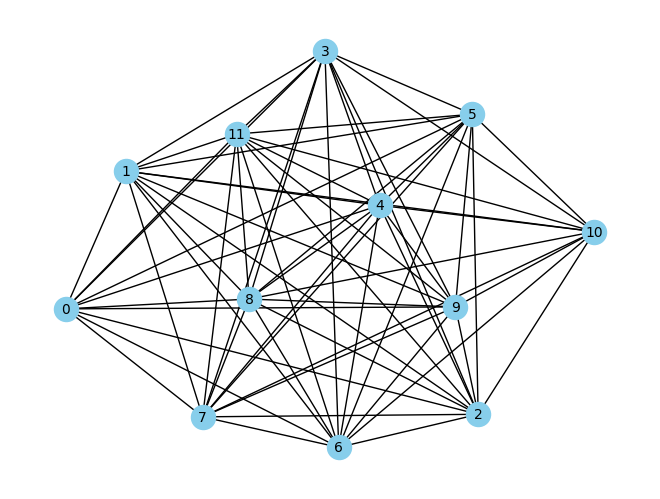

In [21]:
size = 12
pi = np.array([[1,0],[0,1]])
priors = np.array([6,6])
priors = priors/size
graph = generator.generate(size, pi, priors)
show_graph(graph)

solver = Solver()
priors, pi = solver.EM_algorithm(graph, 2, n_iter=10)
print(priors)
print(pi)

graph = generator.generate(size, pi, priors)
show_graph(graph)


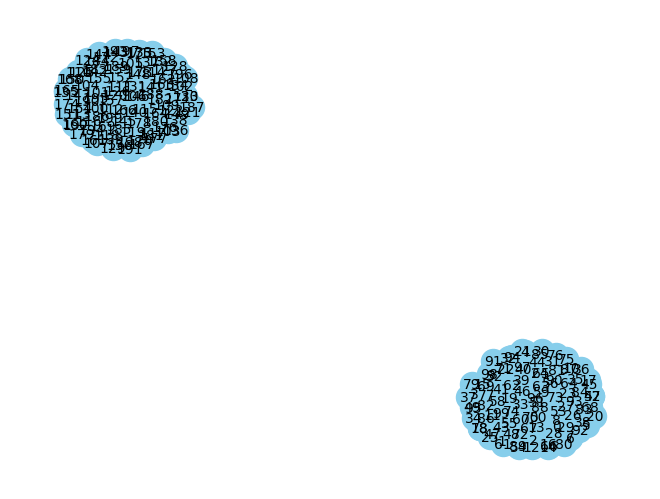

 50%|█████     | 5/10 [00:00<00:00, 59.89it/s]


1.181663164864788e-07


  0%|          | 0/10 [00:00<?, ?it/s]


5.64760538139228e-20


100%|██████████| 10/10 [00:00<00:00, 146.03it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 176.28it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 70.58it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 167.23it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 174.52it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 178.57it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 178.48it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 179.74it/s]


nan
[nan nan]
[[nan nan]
 [nan nan]]
Number of node(s) per cluster :  [-9223372036854775808 -9223372036854775808]  for a graph for size :  200


Exception: The priors are not correctly scaled with the size

In [22]:
size = 200
pi = np.array([[1,0],[0,1]])
priors = np.array([100,100])
priors = priors/size
graph = generator.generate(size, pi, priors)
show_graph(graph)

solver = Solver()
priors, pi = solver.EM_algorithm(graph, 2, n_iter=10)
print(priors)
print(pi)

graph = generator.generate(size, pi, priors)
show_graph(graph)

In [23]:
# n_nodes = 12
# n_clusters = 4
# tau =  np.random.uniform(0, 1, size=(n_nodes, n_clusters))


# pi = np.random.uniform(0, 1, size=(n_clusters, n_clusters))
# graph_edges = np.random.uniform(0, 1, size=(n_nodes, n_nodes))

# exp_term = (pi ** graph_edges[:, :, np.newaxis, np.newaxis]) * ((1 - pi) ** (1 - graph_edges[:, :, np.newaxis, np.newaxis]))

# # for i in range(n_nodes):
# #     for j in range(n_nodes):
# #         for k in range(n_clusters):
# #             for l in range(n_clusters):
# #                 val = (pi[k,l]**graph_edges[i,j]) * (1 - pi[k,l])**(1-graph_edges[i,j])
# #                 if not exp_term[i,j,k,l] == val:
# #                     print("error")

# M = exp_term[:, :, :, :] ** tau[:, np.newaxis, :, np.newaxis]

# # product_axis3 = np.prod(M, axis=3)
# # tau = tau[:, np.newaxis, :, np.newaxis]
# K = exp_term ** tau[np.newaxis, :, np.newaxis, :]


# n_nodes = 12
# n_clusters = 4
# res = np.zeros((n_nodes, n_nodes, n_clusters))
# # M = np.random.uniform(0, 1, size=(n_nodes, n_nodes, n_clusters, n_clusters))

# for i in range(n_nodes):
#     for l in range(n_clusters):
#         p = 1
#         for j in range(n_nodes):
#             if j!=i :
#                 p_temp = 1
#                 for k in range(n_clusters):
#                     power = exp_term[i,j,k,l] ** tau[j,l]
#                     if power != K[i,j,k,l]:
#                         print(i,j,"error")
#                     p_temp *= exp_term[i,j,k,l] ** tau[j,l]


In [24]:
# import numpy as np

# n_nodes = 12
# n_clusters = 4

# M = np.random.uniform(0,1, size=(n_nodes, n_nodes, n_clusters, n_clusters))
# tau = np.random.uniform(0,1, size=(n_nodes, n_clusters))
# K = M ** tau[np.newaxis, :, np.newaxis, :]

# for i in range(n_nodes):
#     for l in range(n_clusters):
#         for j in range(n_nodes):
#             for k in range(n_clusters):
#                 power = M[i,j,k,l] ** tau[j,l]
#                 if power != K[i,j,k,l]:
#                     print(power, '  ' ,K[i,j,k,l])
#                     print("error")

In [25]:
# for i in range(n_nodes):
#     for l in range(n_clusters):
#         p = 1
#         for j in range(n_nodes):
#             if j!=i :
#                 p_temp = 1
#                 for k in range(n_clusters):
#                     p_temp *= M[i,j,k,l] ** tau[j,l]
#                 res[i,j,l] = p_temp

In [26]:
# n_nodes = 12
# n_clusters = 4

# tau = np.random.uniform(0,1, size = (n_nodes, n_clusters))
# graph_edges = np.random.uniform(0,1, size = (n_nodes, n_nodes))
# priors = np.random.uniform(0,1, size = n_clusters)
# pi = np.random.uniform(0,1, size = (n_clusters, n_clusters) )

In [27]:
# solver = Solver()
# generator = GraphGenerator()

# size = 12
# pi = np.array([[0,1,0,0],[1,0,1,0],[0,1,0,1],[0,0,1,0]])
# priors = np.array([5,1,1,5])
# priors = priors/size
# graph = generator.generate(size, pi, priors)
# show_graph(graph)

In [28]:
# n_iter = 10
# n_clusters = 4

# solver = Solver()
# n_nodes = len(graph.nodes)
# graph_edges = np.zeros((n_nodes, n_nodes), dtype=int)
# for i, j in graph.edges:
#     graph_edges[i, j] = 1
#     graph_edges[j, i] = 1 
    
# print(graph_edges)
    
# tau = np.random.uniform(0, 1, size=(n_nodes, n_clusters))
# tau = solver.normalize_tau(tau)
# theta = solver.get_theta_from_tau(tau)
# print(tau)
        
# for i in range(n_iter):
#     # M step
#     priors, pi = solver.M(graph_edges, tau, theta)
#     # print(pi.shape)
#     # print(e+1)
#     # E step
#     tau, theta = solver.E(tau, graph_edges, priors, pi)
#     print(tau)
#     print(" ")
#     print('next iter : ')
    
# priors, pi

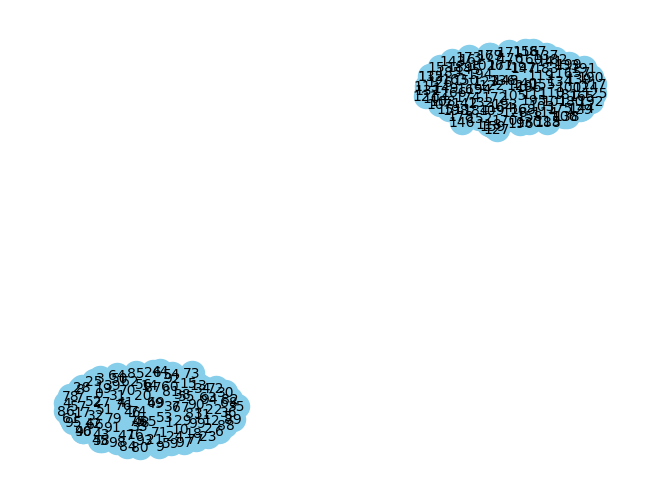

 30%|███       | 3/10 [00:00<00:00, 68.50it/s]


1.6329770295185967e-08


  0%|          | 0/10 [00:00<?, ?it/s]


1.1212405095226522e-30


100%|██████████| 10/10 [00:00<00:00, 93.11it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 176.56it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 157.32it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 170.00it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 184.10it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 192.27it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 183.32it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 167.95it/s]

nan
[nan nan]
[[nan nan]
 [nan nan]]


In [29]:
generator = GraphGenerator()

size = 200
pi = np.array([[1,0],[0,1]])
priors = np.array([100,100])
priors = priors/size
graph = generator.generate(size, pi, priors)
show_graph(graph)

solver = Solver()
priors, pi = solver.EM_algorithm(graph, 2, n_iter=10)
print(priors)
print(pi)

In [30]:
# n_nodes = 10
# n_clusters = 2
# tau = np.random.uniform(0,1, size = (n_nodes, n_clusters))
# n_nodes, _ = tau.shape
# tau_replicated = np.repeat(tau[:, np.newaxis, :, np.newaxis], n_nodes, axis=1)
# theta = tau_replicated * tau_replicated.transpose((1, 0, 3, 2))

# for i in range(n_nodes):
#     for j in range(n_nodes):
#         for k in range(n_clusters):
#             for l in range(n_clusters):
#                 if theta[i,j,k,l] != tau[i,k]*tau[j,l]:
#                     print("error")

In [31]:
# n_nodes = 10
# n_clusters = 4
# graph = generate_random_graph(n_nodes)
# solver = Solver()
# n_nodes = len(graph.nodes)
# graph_edges = np.zeros((n_nodes, n_nodes), dtype=int)
# for i, j in graph.edges:
#     graph_edges[i, j] = 1
#     graph_edges[j, i] = 1 

# tau = np.random.uniform(0, 1, size=(n_nodes, n_clusters))
# theta = solver.get_theta_from_tau(tau)

# thetaX = theta * graph_edges[:, :, np.newaxis, np.newaxis] # (n_nodes, n_nodes, n_clusters, n_clusters)    
# thetaX = np.sum(np.sum(thetaX, axis=1), axis=0) # (n_clusters, n_clusters)
# # Get the denominator of equation in 5.3
# divided = np.sum(np.sum(thetaX, axis=1), axis=0) # (n_clusters, n_clusters)

# # Get the approximation for pi              
# pi1 = thetaX / divided # (n_clusters, n_clusters)

# thetaX = np.zeros((n_nodes, n_nodes, n_clusters, n_clusters))
# divided = np.zeros((n_nodes, n_nodes, n_clusters, n_clusters))
# for l in range(n_clusters):
#     for q in range(n_clusters):
#         for i in range(n_nodes):
#             for j in range(n_nodes):
#                 thetaX[i,j,q,l] = tau[i,q]*tau[j,l]*graph_edges[i,j]
#                 divided[i,j,q,l] = tau[i,q]*tau[j,l]
    
# thetaX = np.sum(np.sum(thetaX, axis=1), axis=0) # (n_clusters, n_clusters)
# divided = np.sum(np.sum(thetaX, axis=1), axis=0) 
# # Get the denominator of equation in 5.3
# # divided = np.sum(np.sum(theta, axis=1), axis=0) # (n_clusters, n_clusters)
# # Get the approximation for pi              
# pi = thetaX / divided

# print(pi == pi1)

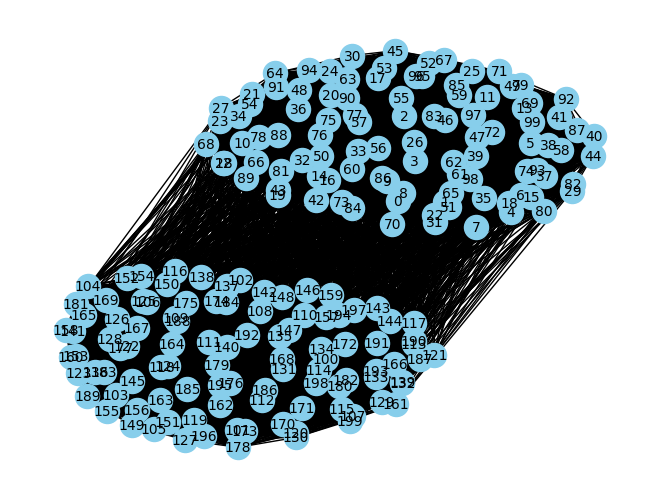

 20%|██        | 2/10 [00:00<00:00, 42.67it/s]


8.43809529306374e-09


  0%|          | 0/10 [00:00<?, ?it/s]


3.379655211006501e-45


100%|██████████| 10/10 [00:00<00:00, 86.75it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 117.89it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 63.25it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 86.12it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 104.03it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 90.84it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 116.06it/s]


nan


100%|██████████| 10/10 [00:00<00:00, 133.17it/s]


nan
[nan nan]
[[nan nan]
 [nan nan]]
Number of node(s) per cluster :  [-9223372036854775808 -9223372036854775808]  for a graph for size :  200


Exception: The priors are not correctly scaled with the size

In [32]:
size = 200
pi = np.array([[1,0.1],[0.1,1]])
priors = np.array([100,100])
priors = priors/size
graph = generator.generate(size, pi, priors)
show_graph(graph)

solver = Solver()
priors, pi = solver.EM_algorithm(graph, 2, n_iter=10)
print(priors)
print(pi)

graph = generator.generate(size, pi, priors)
show_graph(graph)